In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical

In [20]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
scalerx = StandardScaler().fit(xt)
xScaled = scalerx.transform(xt)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
counterx=0
countery=0
add = []
for idx, i in enumerate(y_train):
        if i == 1:
            counterx += 4
            for k in range(0, 4):
                y_train = np.append(y_train, i)
                add = np.append(add, X_train[idx, :])
        else: 
             countery += 1
X_train = np.vstack((X_train, add))
print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

In [4]:
# MLP = Sequential()
# MLP.add(Convolution2D(16, (2,2), input_shape=(28,28,3), activation='relu'))
# MLP.add(MaxPooling2D(pool_size=(2,2)))
# MLP.add(Convolution2D(16, (2,2), activation='relu'))
# MLP.add(MaxPooling2D(pool_size=(2,2)))
# MLP.add(Flatten()) 
# MLP.add(Dense(64, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))

In [5]:
MLP = Sequential()
MLP.add(Dense(16,input_dim=28*28*3, activation='relu'))
MLP.add(Dense(16, activation='relu'))
MLP.add(Dense(2, activation='softmax'))

In [6]:
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 18824     
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 18870 (73.71 KB)
Trainable params: 18870 (73.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
MLP.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mse'])

In [8]:
callback = EarlyStopping(monitor='val_loss', patience=8, mode='auto', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_validation, y_validation), verbose=2, batch_size=64, callbacks=[callback])

Epoch 1/25
62/62 - 1s - loss: 0.5089 - accuracy: 0.8302 - mse: 0.2930 - val_loss: 0.4155 - val_accuracy: 0.8697 - val_mse: 0.3302 - 1s/epoch - 17ms/step
Epoch 2/25
62/62 - 0s - loss: 0.3959 - accuracy: 0.8522 - mse: 0.3469 - val_loss: 0.3589 - val_accuracy: 0.8721 - val_mse: 0.3613 - 183ms/epoch - 3ms/step
Epoch 3/25
62/62 - 0s - loss: 0.3563 - accuracy: 0.8522 - mse: 0.3654 - val_loss: 0.3337 - val_accuracy: 0.8715 - val_mse: 0.3762 - 176ms/epoch - 3ms/step
Epoch 4/25
62/62 - 0s - loss: 0.3356 - accuracy: 0.8538 - mse: 0.3760 - val_loss: 0.3205 - val_accuracy: 0.8733 - val_mse: 0.3844 - 173ms/epoch - 3ms/step
Epoch 5/25
62/62 - 0s - loss: 0.3241 - accuracy: 0.8563 - mse: 0.3821 - val_loss: 0.3122 - val_accuracy: 0.8703 - val_mse: 0.3885 - 166ms/epoch - 3ms/step
Epoch 6/25
62/62 - 0s - loss: 0.3165 - accuracy: 0.8586 - mse: 0.3861 - val_loss: 0.3068 - val_accuracy: 0.8703 - val_mse: 0.3927 - 156ms/epoch - 3ms/step
Epoch 7/25
62/62 - 0s - loss: 0.3122 - accuracy: 0.8571 - mse: 0.3903 - 

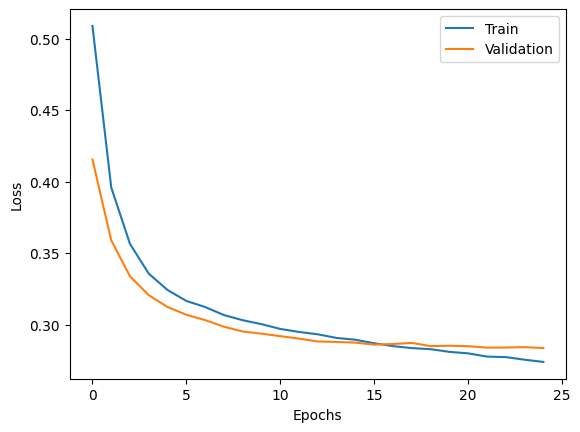

In [9]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [10]:
from sklearn.metrics import f1_score
y_pred = MLP.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_test, y_test, verbose=1)
print("F1 ->", f1_score(y_test, y_pred))


20/20 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8355 - mse: 0.4028
F1 -> 0.08849557522123894


In [11]:
counter = 0
for i in range(len(y_pred)):
    if(y_pred[i] != y_test[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

103

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(518, 4, 99, 5)